<a href="https://colab.research.google.com/github/ridvanyigit/My-Projects/blob/main/Mobil-Price_Classification-ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/archive/train.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/archive/test.csv'

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore', category=UserWarning)
tf.__version__

'2.17.1'

Loading Training and Test Data

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

Exploring the Dataset: Data Overview

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Exploratory Data Analysis: Summary Statistics

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Identifying and Displaying Duplicate Records

In [ ]:
duplicates = train_data[train_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


Visualizing Features with Box Plots

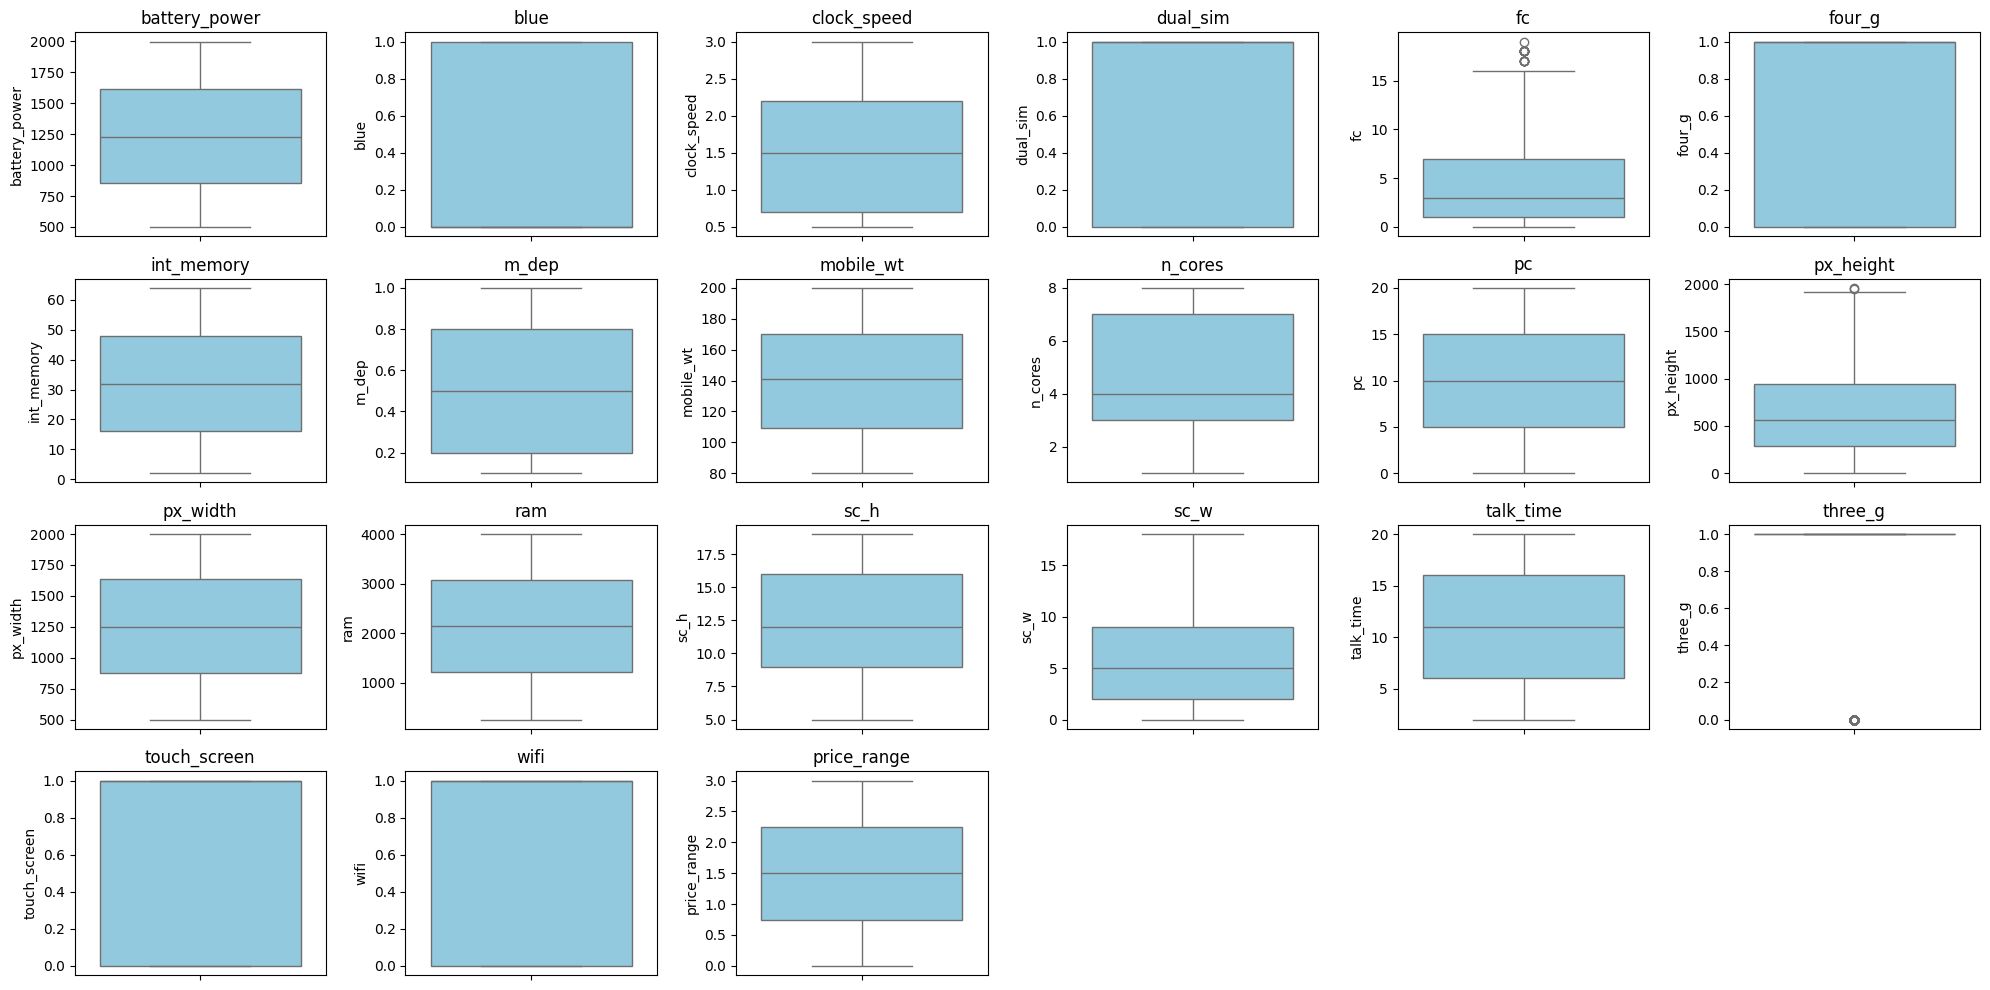

In [ ]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(train_data.columns, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(data=train_data[column], color="skyblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

Identifying Outliers Using IQR Method

In [ ]:
Q1 = train_data['fc'].quantile(0.25)
Q3 = train_data['fc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier Bounds: {lower_bound} - {upper_bound}")

Outlier Bounds: -8.0 - 16.0


Handling Outliers with Clipping

In [ ]:
train_data['fc'] = np.where(train_data['fc'] < lower_bound, lower_bound, train_data['fc'])
train_data['fc'] = np.where(train_data['fc'] > upper_bound, upper_bound, train_data['fc'])

Outlier Detection for 'FC' Column Using Boxplot

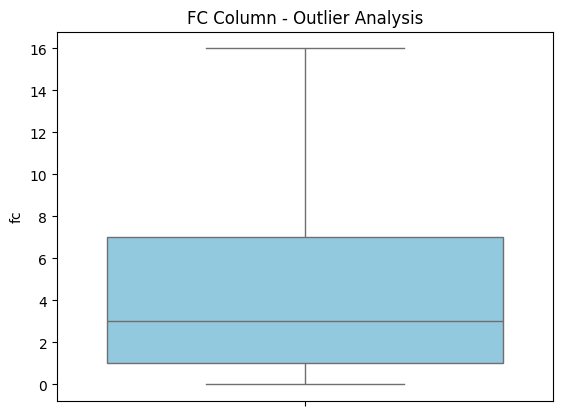

In [ ]:
sns.boxplot(data=train_data['fc'], color="skyblue")
plt.title("FC Column - Outlier Analysis")
plt.show()

Visualizing the Distribution of Price Range Classes

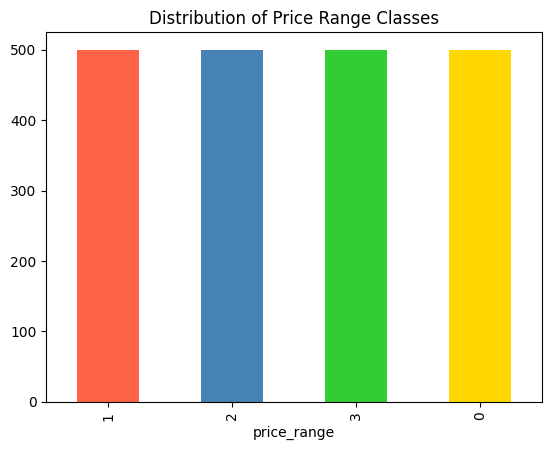

In [ ]:
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
train_data['price_range'].value_counts().plot(kind='bar', color=colors)
plt.title("Distribution of Price Range Classes")
plt.show()

Visualizing the Relationship Between RAM and Price Range

<ipython-input-400-48e381bdd89b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=train_data, palette='Set2')


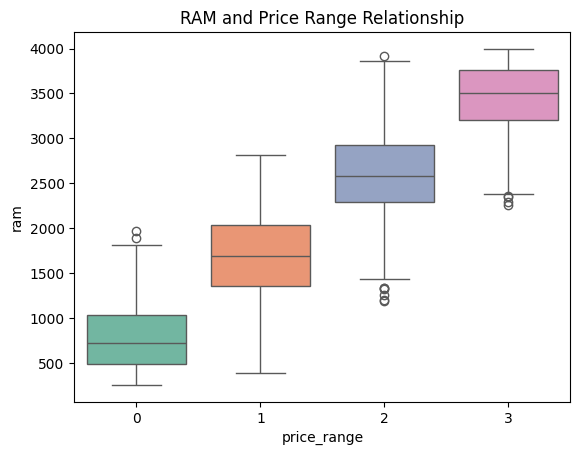

In [ ]:
sns.boxplot(x='price_range', y='ram', data=train_data, palette='Set2')
plt.title("RAM and Price Range Relationship")
plt.show()

Defining Features and Target Variable

In [ ]:
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

Splitting the Dataset into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Normalization with StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Neural Network Model

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compiling the Model

In [ ]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the Model with Training Data

In [ ]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2418 - loss: 1.4014 - val_accuracy: 0.2750 - val_loss: 1.3995
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2706 - loss: 1.3640 - val_accuracy: 0.3031 - val_loss: 1.3819
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2990 - loss: 1.3518 - val_accuracy: 0.3344 - val_loss: 1.3636
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3108 - loss: 1.3382 - val_accuracy: 0.3375 - val_loss: 1.3390
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 1.3157 - val_accuracy: 0.3625 - val_loss: 1.3048
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3670 - loss: 1.2818 - val_accuracy: 0.4187 - val_loss: 1.2597
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 1.2427 - val_accuracy: 0.4406 - val_loss: 1.2039
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4628 - loss: 1.1898 - val_accuracy: 0.4531 - val_loss:

Plotting Model Accuracy Over Epochs

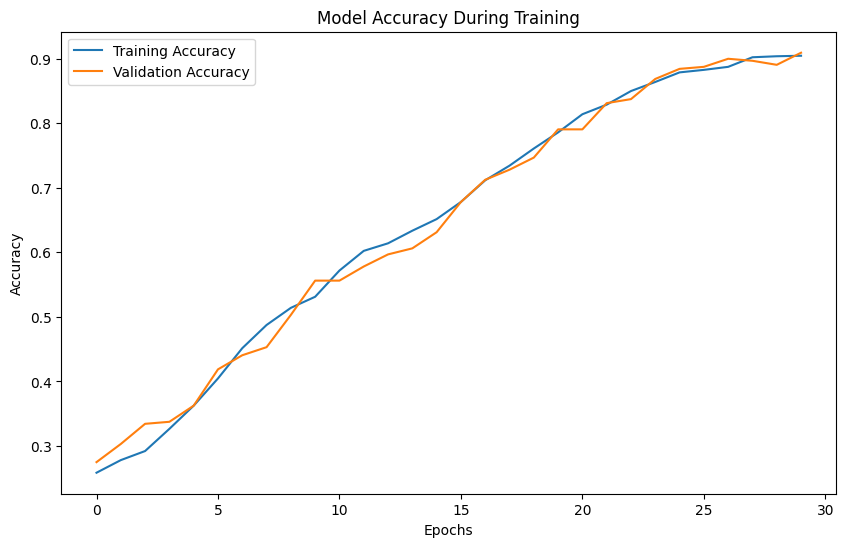

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Single Prediction
* battery_power: 1043
* blue: 1
* clock_speed: 1.8
* dual_sim: 1
* fc: 14
* four_g: 0
* int_memory: 5
* m_dep: 0.1
* mobile_wt: 193
* n_cores: 3
* pc: 16
* px_height: 226
* px_width: 1412
* ram: 3476
* sc_h: 12
* sc_w: 7
* talk_time: 2
* three_g: 0
* touch_screen: 1
* wifi: 0

In [ ]:
single_input = sc.transform([[1043, 1, 1.8, 1, 14, 0, 5, 0.1, 193, 3, 16, 226, 1412, 3476, 12, 7, 2, 0, 1, 0]])
result = ann.predict(single_input)
predicted_class = np.argmax(result, axis=1)
print(f"Predicted Class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class: 2


Concatenating Predicted and Actual Labels for Model Evaluation

In [ ]:
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[0 0]
 [2 2]
 [0 1]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [3 3]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [3 3]
 [3 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [0 0]
 [1 2]
 [3 3]
 [2 2]
 [0 0]
 [3 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [0 0]
 [1 1]
 [3 2]
 [0 0]
 [0 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [3 2]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [3 3]
 [0 0]
 [3 2]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 1]
 [3 3]

Making Predictions and Converting to Class Labels

In [ ]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Evaluating Model Performance: Confusion Matrix and Accuracy

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n",cm)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
 [[102   3   0   0]
 [ 15  73   3   0]
 [  0   4  79   9]
 [  0   0   5 107]]
Accuracy: 0.9025


Visualizing the Confusion Matrix

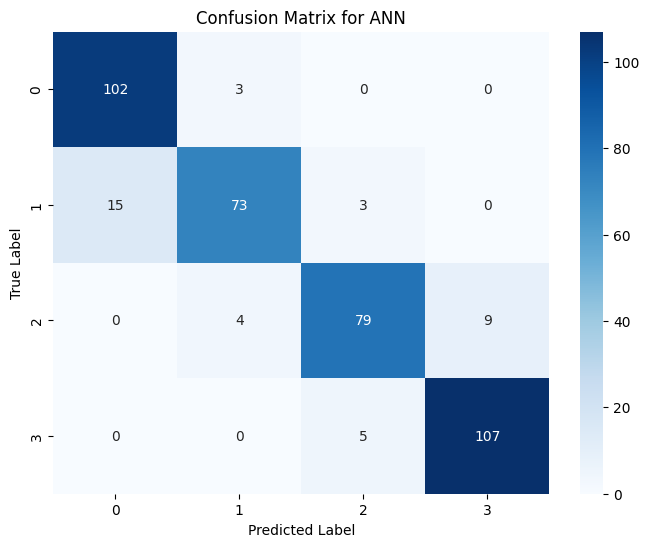

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()